In [0]:
!ls

sample_data


In [0]:
!pip install pydrive

    100% |████████████████████████████████| 993kB 10.2MB/s 
  Stored in directory: /root/.cache/pip/wheels/fa/d2/9a/d3b6b506c2da98289e5d417215ce34b696db856643bad779f4
Successfully built pydrive


In [0]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
download = drive.CreateFile({'id': '10qN7OUzTutCg8ruwFosml0xzi0elsI5N'})

In [0]:
download.GetContentFile('train-scene classification.zip')

In [0]:
!unzip 'train-scene classification.zip'

Archive:  train-scene classification.zip
   creating: train/
  inflating: train.csv               
  inflating: train/0.jpg             
  inflating: train/1.jpg             
  inflating: train/10.jpg            
  inflating: train/100.jpg           
  inflating: train/1000.jpg          
  inflating: train/10000.jpg         
  inflating: train/10001.jpg         
  inflating: train/10002.jpg         
  inflating: train/10003.jpg         
  inflating: train/10004.jpg         
  inflating: train/10005.jpg         
  inflating: train/10006.jpg         
  inflating: train/10007.jpg         
  inflating: train/10008.jpg         
  inflating: train/10009.jpg         
  inflating: train/1001.jpg          
  inflating: train/10010.jpg         
  inflating: train/10011.jpg         
  inflating: train/10012.jpg         
  inflating: train/10013.jpg         
  inflating: train/10014.jpg         
  inflating: train/10015.jpg         
  inflating: train/10016.jpg         
  inflating: train/10017.jp

In [0]:
download = drive.CreateFile({'id': '1UlAZRNeJFRNzknQIsitfLW0jLEECuDss'})

In [0]:
download.GetContentFile('test_intel.csv')

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
import pandas as pd

In [0]:
train_df = pd.read_csv("train.csv")

In [0]:
train_df.head()

,image_name,label
0,0.jpg,0
1,1.jpg,4
2,2.jpg,5
3,4.jpg,0
4,7.jpg,4


In [0]:
path="/content/"

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [0]:
tfms = get_transforms(do_flip=True,flip_vert=False, max_lighting=0.2, max_zoom=1.05, max_warp=0.2)

In [0]:
src = (ImageList.from_csv(path, 'train.csv', folder='train')
       .split_by_rand_pct(0.3)
       .label_from_df(label_delim=' '))

In [0]:
data = (src.transform(tfms, size=300)
        .databunch().normalize(imagenet_stats))

In [0]:
dropout = [0.3,0.6,0.9,0.2,0.5]

In [0]:
data.c

6

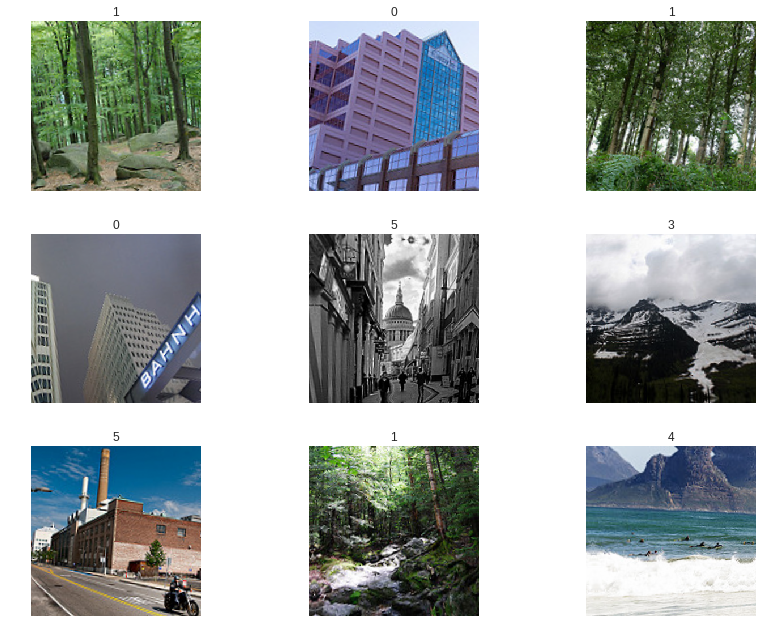

In [0]:
data.show_batch(rows=3, figsize=(12,9))

In [0]:
arch = models.resnet50

In [0]:
learn = cnn_learner(data, arch,ps=dropout)

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


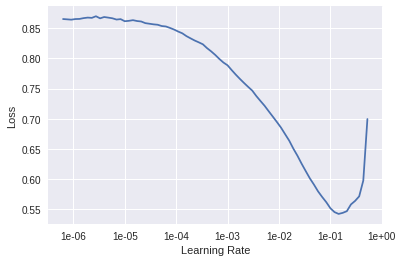

In [0]:
learn.recorder.plot()

In [0]:
lr = 0.005

In [0]:
learn.fit_one_cycle(1, slice(lr))

epoch,train_loss,valid_loss,time
0,0.112193,0.073796,06:47


In [0]:
learn.unfreeze()

In [0]:
lr=np.array([lr/100,lr/10,lr])

In [0]:
learn.fit_one_cycle(6, lr)

epoch,train_loss,valid_loss,time
0,0.091987,0.111537,08:28
1,0.096042,0.087464,08:23
2,0.082558,0.081607,08:24
3,0.065449,0.063734,08:23
4,0.049070,0.059095,08:26
5,0.040806,0.058187,08:22


In [0]:
learn.unfreeze()

In [0]:
learn.fit_one_cycle(10, lr)

epoch,train_loss,valid_loss,time
0,0.255016,0.105304,06:35
1,0.104180,0.073918,06:36
2,0.085693,0.068066,06:37
3,0.070680,0.062931,06:35
4,0.062575,0.057283,06:37
5,0.059680,0.057571,06:35
6,0.052511,0.056528,06:36
7,0.044539,0.057376,06:36
8,0.043218,0.055809,06:36
9,0.043710,0.056001,06:37


In [0]:
learn.save('stage-1-rn50')

In [0]:
learn.export()

In [0]:
test = ImageList.from_csv(path, 'test_intel.csv', folder='train')

In [0]:
learn = load_learner(path, test=test)
preds, _ = learn.get_preds(ds_type=DatasetType.Test)

In [0]:
preds

tensor([[1.1506e-04, 9.4561e-08, 2.7183e-07, 2.5411e-07, 2.3002e-08, 9.9990e-01],
        [9.9997e-01, 1.3808e-07, 1.5113e-06, 8.3748e-08, 9.5709e-07, 3.6409e-06],
        [1.4632e-06, 8.7239e-07, 3.4716e-05, 3.3308e-07, 9.9998e-01, 6.1035e-06],
        ...,
        [4.1670e-07, 4.2444e-06, 9.9922e-01, 5.4961e-04, 6.4961e-07, 1.0667e-06],
        [6.1929e-06, 1.0000e+00, 5.2574e-06, 1.8584e-07, 2.3280e-07, 2.1759e-08],
        [9.8726e-01, 4.7786e-05, 8.6045e-04, 6.2168e-06, 6.1408e-05, 7.8932e-03]])

In [0]:
labelled_preds=[]
for i in preds:
  a = [t.numpy() for t in i]
  labelled_preds.append(a.index(max(a)))
  

In [0]:
test_df = pd.read_csv("test_intel.csv")

In [0]:
fname = test_df.iloc[:,0].values

In [0]:
df = pd.DataFrame({'image_name':fname, 'label':labelled_preds}, columns=['image_name', 'label'])

In [0]:
df.head()

,image_name,label
0,3.jpg,5
1,5.jpg,0
2,6.jpg,4
3,11.jpg,4
4,14.jpg,5


In [0]:
df.to_csv(path+'submission.csv', index=False)

In [0]:
!ls

 adc.json     sample_data      train
 export.pkl   submission.csv   train.csv
 models       test_intel.csv  'train-scene classification.zip'
